## IDS 704: Data Scrapping and Text Analysis - Topic Modeling
### Derek Wales, MIDS 21

In [3]:
# Suppressing Warnings
options(warn=-1)

# Loading required libraries
library(text2vec)
library(dplyr)
library(tm)
library(tidytext)
library(SnowballC)
library(stringr)
library(topicmodels)
library(stm)
library(broom)
library(ggplot2)
library(stm)

# Loading stopwords
data("stop_words")

## Question 1: 
Using the link above and the downloaded file, load the lyrics dataset into your workspace.

In [4]:
billboard_df = read.csv('billboard_lyrics_1964-2015.csv', stringsAsFactors = FALSE)
head(billboard_df, 3)

Rank,Song,Artist,Year,Lyrics,Source
<int>,<chr>,<chr>,<int>,<chr>,<int>
1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly bully sam the sham the pharaohs domingo samudio uno dos one two tres quatro matty told hatty about a thing she saw had two big horns and a wooly jaw wooly bully wooly bully wooly bully wooly bully wooly bully hatty told matty lets dont take no chance lets not belseven come and learn to dance wooly bully wooly bully wooly bully wooly bully wooly bully matty told hatty thats the thing to do get you someone really to pull the wool with you wooly bully wooly bully wooly bully wooly bully wooly bully lseven the letter l and the number 7 when typed they form a rough square l7 so the lyrics mean lets not be square,3
2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love you i cant help myself i love you and nobody elsein and out my life you come and you go leaving just your picture behind and i kissed it a thousand timeswhen you snap your finger or wink your eye i come arunning to you im tied to your apron strings and theres nothing that i can docant help myself no i cant help myselfsugar pie honey bunch im weaker than a man should be i cant help myself im a fool in love you seewanna tell you i dont love you tell you that were through and ive tried but every time i see your face i get all choked up insidewhen i call your name girl it starts the flame burning in my heart tearing it all apart no matter how i try my love i cannot hidecause sugar pie honey bunch you know that im weak for you cant help myself i love you and nobody elsesugar pie honey bunch do anything you ask me to cant help myself i want you and nobody elsesugar pie honey bunch you know that i love you i cant help myself i cant help myself,1
3,i cant get no satisfaction,the rolling stones,1965,,1


## Question 2: 
Subset the data into “decades of lyrics” so that each new dataframe contains the lyrics and other columns from a particular decade of music. Use the following decades so that each has a dataset of song lyrics: 1965-1974, 1975-1984, 1985-1994, 1995-2004, 2005-2014

In [5]:
# Subsetting 1965 to 1974
df_65_74 = subset(billboard_df, billboard_df$Year >= 1965 & billboard_df$Year <1975)

# Subsetting 1975 to 1984
df_75_84 = subset(billboard_df, billboard_df$Year >= 1975 & billboard_df$Year <1985)

# Subsetting 1985 to 1994
df_85_94 = subset(billboard_df, billboard_df$Year >= 1985 & billboard_df$Year <1995)

# Subsetting 1995 to 2004
df_95_04 = subset(billboard_df, billboard_df$Year >= 1995 & billboard_df$Year <2005)

# Subsetting 2005 to 2014 
df_05_14 = subset(billboard_df, billboard_df$Year >= 2005 & billboard_df$Year <2015)

## Question 3: 
Prepare each of the datasets so that it can be analyzed using the topicmodels package </br>
https://cran.r-project.org/web/packages/topicmodels/topicmodels.pdf

In [6]:
# Creating a tidy DF (Song and Lyrics, based on words).
tidy_df_65_74_reviews <- df_65_74 %>%
    select(Song, Lyrics)  %>%
    unnest_tokens("word", Lyrics) 

# Removing the stop words
tidy_df_65_74_reviews<-tidy_df_65_74_reviews %>% anti_join(stop_words)

# Removing Numbers (punctuation/word case done automatically with TidyText)
tidy_df_65_74_reviews_2<-tidy_df_65_74_reviews[-grep("\\b\\d+\\b", tidy_df_65_74_reviews$word),]

# Removing the White Spaces
tidy_df_65_74_reviews_2$word <- gsub("\\s+","",tidy_df_65_74_reviews_2$word)

# Stemming (putting in its conjugate form)
tidy_df_65_74_reviews_2<-tidy_df_65_74_reviews_2 %>%
    mutate_at("word", funs(wordStem((.), language="en")))

# Creating a Document Term Matrix for the 65-74 Songs
tidy_df_65_74_DTM<-
  tidy_df_65_74_reviews_2 %>%
  count(Song, word) %>%
  cast_dtm(Song, word, n)

Joining, by = "word"


In [7]:
# Creating a tidy DF (Song and Lyrics, based on words).
tidy_df_75_84_reviews <- df_75_84 %>%
    select(Song, Lyrics)  %>%
    unnest_tokens("word", Lyrics) 

# Removing the stop words
tidy_df_75_84_reviews<-tidy_df_75_84_reviews %>% anti_join(stop_words)

# Removing Numbers (punctuation/word case done automatically with TidyText)
tidy_df_75_84_reviews_2<-tidy_df_75_84_reviews[-grep("\\b\\d+\\b", tidy_df_75_84_reviews$word),]

# Removing the White Spaces
tidy_df_75_84_reviews_2$word <- gsub("\\s+","",tidy_df_75_84_reviews_2$word)

# Stemming (putting in its conjugate form)
tidy_df_75_84_reviews_2<-tidy_df_75_84_reviews_2 %>%
    mutate_at("word", funs(wordStem((.), language="en")))

# Creating a Document Term Matrix for the 75-84 Songs
tidy_df_75_84_DTM<-
  tidy_df_75_84_reviews_2 %>%
  count(Song, word) %>%
  cast_dtm(Song, word, n)

Joining, by = "word"


In [8]:
# Creating a tidy DF (Song and Lyrics, based on words).
tidy_df_85_94_reviews <- df_85_94 %>%
    select(Song, Lyrics)  %>%
    unnest_tokens("word", Lyrics) 

# Removing the stop words
tidy_df_85_94_reviews<-tidy_df_85_94_reviews %>% anti_join(stop_words)

# Removing Numbers (punctuation/word case done automatically with TidyText)
tidy_df_85_94_reviews_2<-tidy_df_85_94_reviews[-grep("\\b\\d+\\b", tidy_df_85_94_reviews$word),]

# Removing the White Spaces
tidy_df_85_94_reviews_2$word <- gsub("\\s+","",tidy_df_85_94_reviews_2$word)

# Stemming (putting in its conjugate form)
tidy_df_85_94_reviews_2<-tidy_df_85_94_reviews_2 %>%
    mutate_at("word", funs(wordStem((.), language="en")))

# Creating a Document Term Matrix for the 85-94 Songs
tidy_df_85_94_DTM<-
  tidy_df_85_94_reviews_2 %>%
  count(Song, word) %>%
  cast_dtm(Song, word, n)

Joining, by = "word"


In [9]:
# Creating a tidy DF (Song and Lyrics, based on words).
tidy_df_95_04_reviews <- df_95_04 %>%
    select(Song, Lyrics)  %>%
    unnest_tokens("word", Lyrics) 

# Removing the stop words
tidy_df_95_04_reviews<-tidy_df_95_04_reviews %>% anti_join(stop_words)

# Removing Numbers (punctuation/word case done automatically with TidyText)
tidy_df_95_04_reviews_2<-tidy_df_95_04_reviews[-grep("\\b\\d+\\b", tidy_df_95_04_reviews$word),]

# Removing the White Spaces
tidy_df_95_04_reviews_2$word <- gsub("\\s+","",tidy_df_95_04_reviews_2$word)

# Stemming (putting in its conjugate form)
tidy_df_95_04_reviews_2<-tidy_df_95_04_reviews_2 %>%
    mutate_at("word", funs(wordStem((.), language="en")))

# Creating a Document Term Matrix for the 95-04 Songs
tidy_df_95_04_DTM<-
  tidy_df_95_04_reviews_2 %>%
  count(Song, word) %>%
  cast_dtm(Song, word, n)

Joining, by = "word"


In [10]:
# Creating a tidy DF (Song and Lyrics, based on words).
tidy_df_05_14_reviews <- df_05_14 %>%
    select(Song, Lyrics)  %>%
    unnest_tokens("word", Lyrics) 

# Removing the stop words
tidy_df_05_14_reviews<-tidy_df_05_14_reviews %>% anti_join(stop_words)

# Removing Numbers (punctuation/word case done automatically with TidyText)
tidy_df_05_14_reviews_2<-tidy_df_05_14_reviews[-grep("\\b\\d+\\b", tidy_df_05_14_reviews$word),]

# Removing the White Spaces
tidy_df_05_14_reviews_2$word <- gsub("\\s+","",tidy_df_05_14_reviews_2$word)

# Stemming (putting in its conjugate form)
tidy_df_05_14_reviews_2<-tidy_df_05_14_reviews_2 %>%
    mutate_at("word", funs(wordStem((.), language="en")))

# Creating a Document Term Matrix for the 05-14 Songs
tidy_df_05_14_DTM<-
  tidy_df_05_14_reviews_2 %>%
  count(Song, word) %>%
  cast_dtm(Song, word, n)

Joining, by = "word"


## Question 4: 
Choose a single dataset and run three models to try and identify an appropriate value for k (the number of topics). State which value of k you choose after running these three models as well as why you picked those particular three values of k to run for each of your models.

### Answer:
Looking at the plots below, it’s clear that there were a lot of love songs made between 1985-94 and a smaller value of k resulted in more clear categories. As k increased, the many of the top 5 words repeated and the other words in the clustering were similar.  Words like girl, she, heart, love, etc were repeated across multiple categories. 

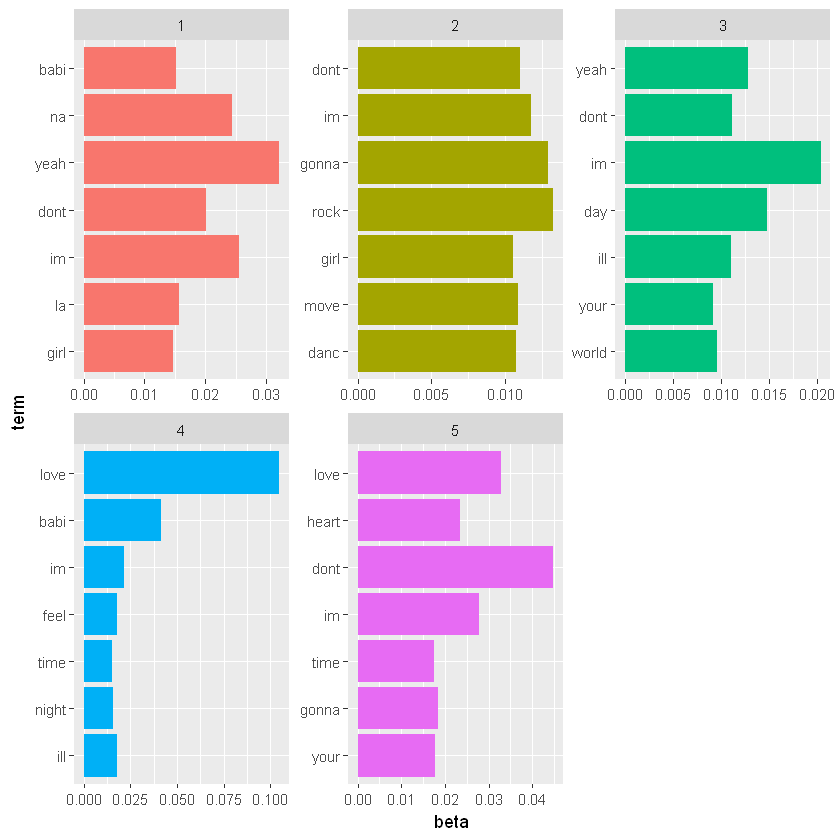

In [26]:
# I picked tidy_df_85_94_DTM because that was the best period of music, starting w/k = 5
topic_model_85_94_k5 <- LDA(tidy_df_85_94_DTM, k=5, control = list(seed = 321))
topic_model_85_94_k5 <- tidy(topic_model_85_94_k5, matrix = "beta")

music_85_94_topics_k5_terms <- 
  topic_model_85_94_k5 %>%
  group_by(topic) %>%
  top_n(7, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

music_85_94_topics_k5_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

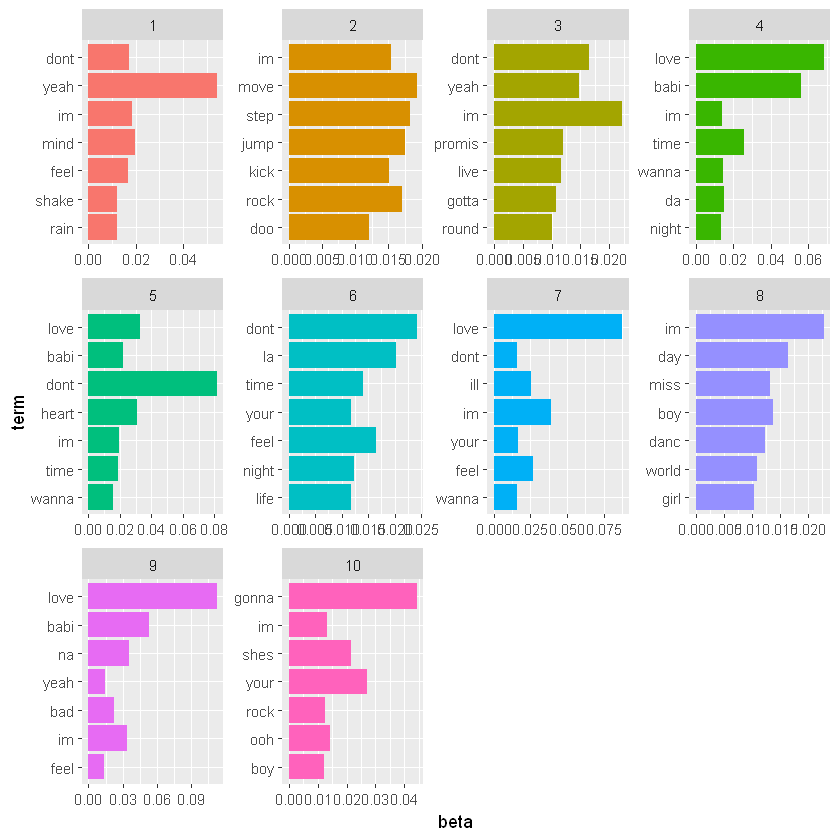

In [25]:
# K = 10 
topic_model_85_94_k10 <- LDA(tidy_df_85_94_DTM, k=10, control = list(seed = 321))
music_85_94_topics_k10 <- tidy(topic_model_85_94_k10, matrix = "beta")

music_85_94_topics_k10_terms <- 
  music_85_94_topics_k10 %>%
  group_by(topic) %>%
  top_n(7, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

music_85_94_topics_k10_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

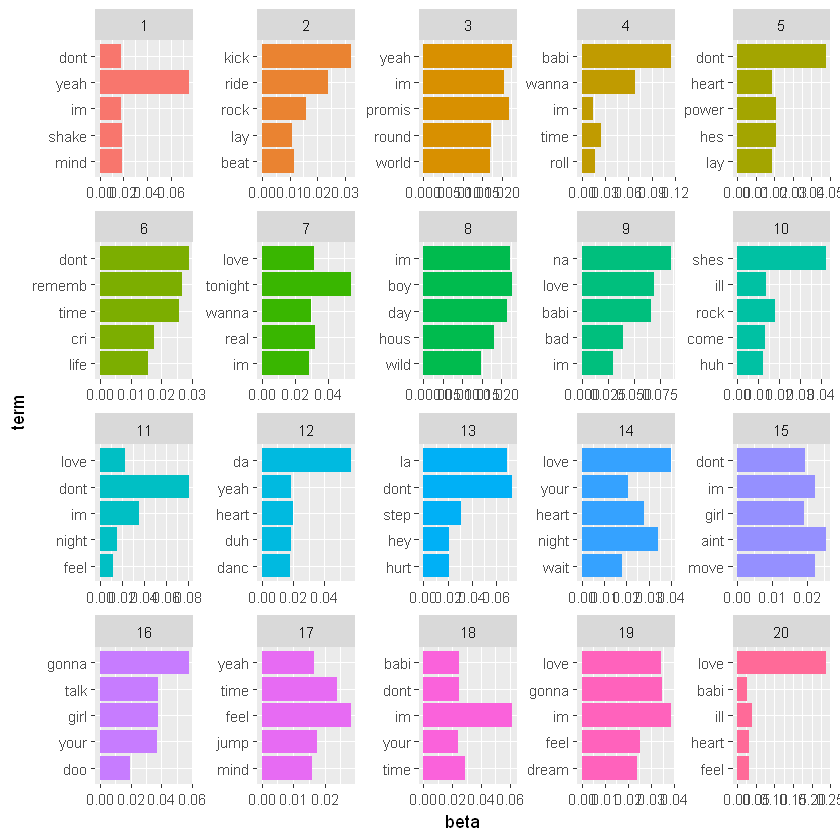

In [21]:
# K = 20
topic_model_85_94_k20 <- LDA(tidy_df_85_94_DTM, k=20, control = list(seed = 321))
topic_model_85_94_k20 <- tidy(topic_model_85_94_k20, matrix = "beta")

music_85_94_topics_k20_terms <- 
  topic_model_85_94_k20 %>%
  group_by(topic) %>%
  top_n(5, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

music_85_94_topics_k20_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

## Question 5: 
Using the same value of k, run a model on each of the other decades lyrics datasets.
#### Setting K = 5, looking at the top 7 terms across all datasets.

#### Answer:
Each decade had varying degrees of success looking at only 5 topics.</br>

1965-74 - Grouping several of the topics into "love" songs but also one about what is seemingly rock and roll and another dancing. 

1975-84 - Four of the five topics had love as the top word. Meaning that k = 5 had poor segmentation for this decade.

1985-94 - Although there were several love based topics, this decade also have dance and other topics. 

1995-04 - Again had many love related topics and hip hop/urban themes.
 
2005-14 - The topics from this decade were very personal with frequent use of the term I'm. 

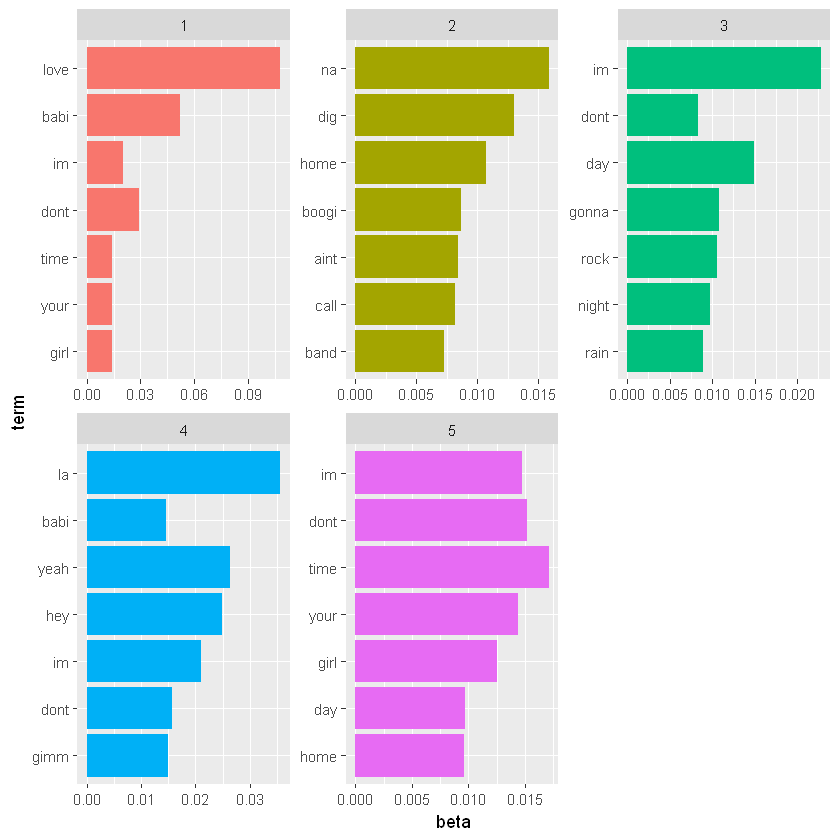

In [24]:
# I picked tidy_df_85_94_DTM because that was the best period of music, starting w/k = 5
topic_model_65_74_k5 <- LDA(tidy_df_65_74_DTM, k=5, control = list(seed = 321))
topic_model_65_74_k5 <- tidy(topic_model_65_74_k5, matrix = "beta")

music_65_74_topics_k5_terms <- 
  topic_model_65_74_k5 %>%
  group_by(topic) %>%
  top_n(7, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

music_65_74_topics_k5_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

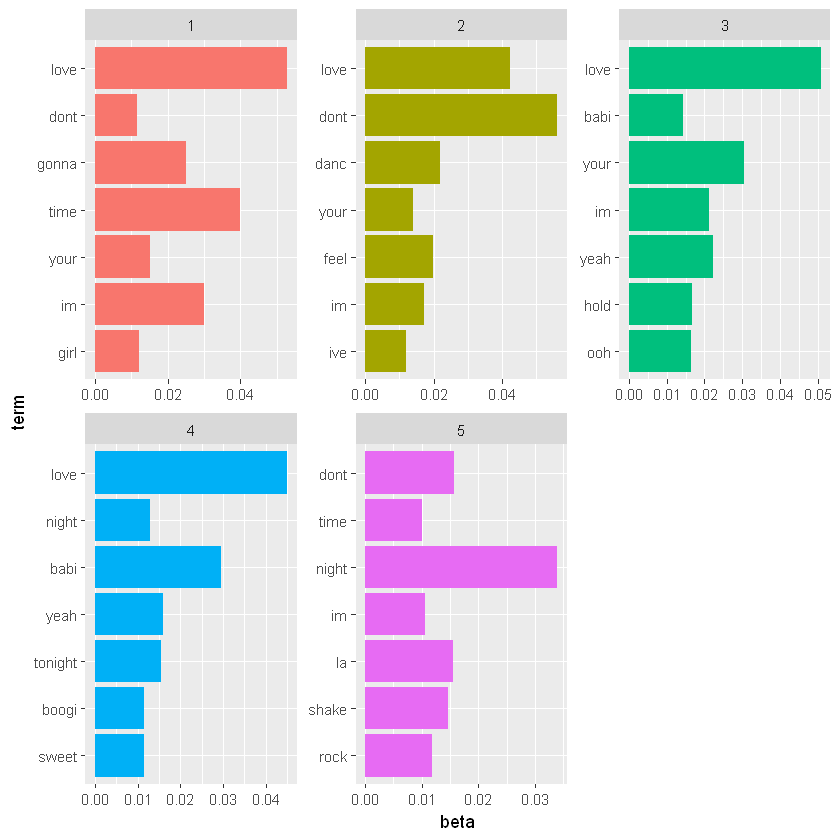

In [27]:
# I picked tidy_df_85_94_DTM because that was the best period of music, starting w/k = 5
topic_model_75_84_k5 <- LDA(tidy_df_75_84_DTM, k=5, control = list(seed = 321))
topic_model_75_84_k5 <- tidy(topic_model_75_84_k5, matrix = "beta")

music_75_84_topics_k5_terms <- 
  topic_model_75_84_k5 %>%
  group_by(topic) %>%
  top_n(7, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

music_75_84_topics_k5_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

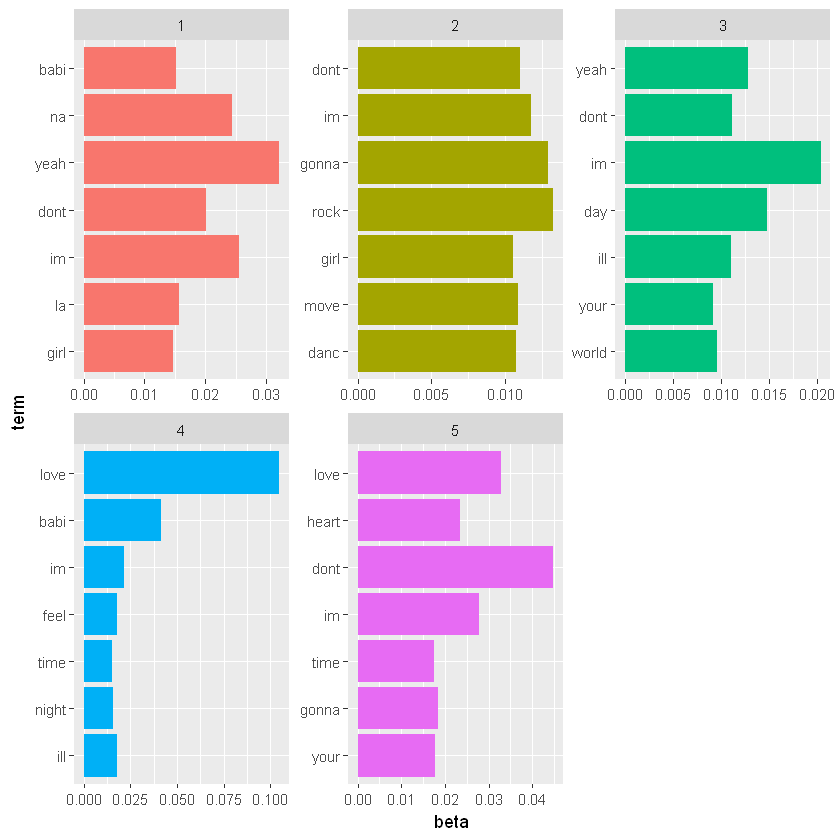

In [28]:
# I picked tidy_df_85_94_DTM because that was the best period of music, starting w/k = 5
topic_model_85_94_k5 <- LDA(tidy_df_85_94_DTM, k=5, control = list(seed = 321))
topic_model_85_94_k5 <- tidy(topic_model_85_94_k5, matrix = "beta")

music_85_94_topics_k5_terms <- 
  topic_model_85_94_k5 %>%
  group_by(topic) %>%
  top_n(7, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

music_85_94_topics_k5_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

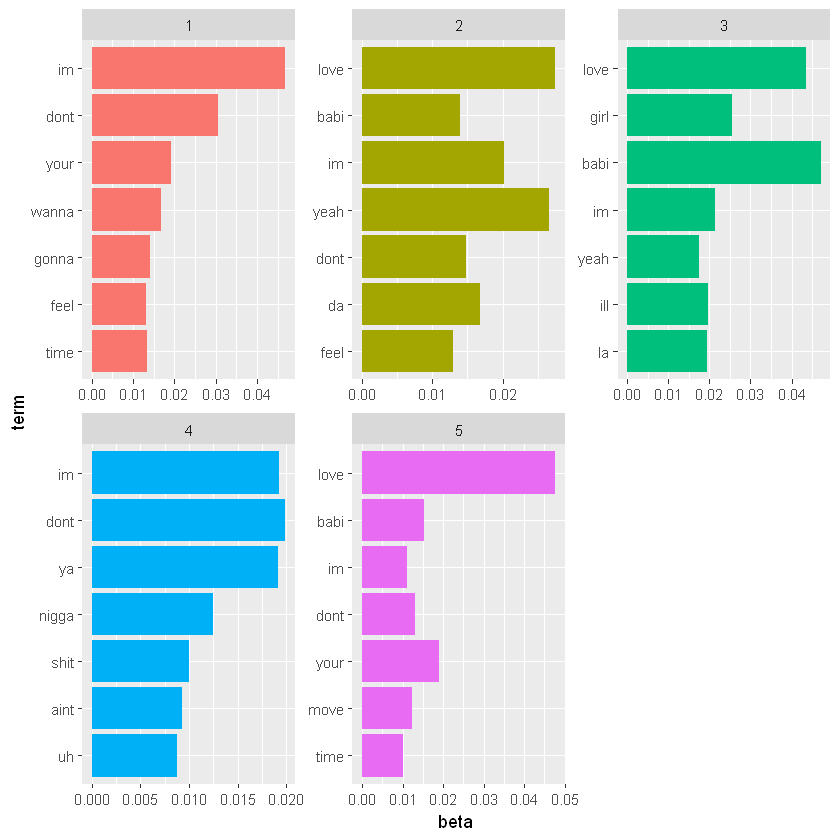

In [29]:
# I picked tidy_df_85_94_DTM because that was the best period of music, starting w/k = 5
topic_model_95_04_k5 <- LDA(tidy_df_95_04_DTM, k=5, control = list(seed = 321))
topic_model_95_04_k5 <- tidy(topic_model_95_04_k5, matrix = "beta")

music_95_04_topics_k5_terms <- 
  topic_model_95_04_k5 %>%
  group_by(topic) %>%
  top_n(7, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

music_95_04_topics_k5_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

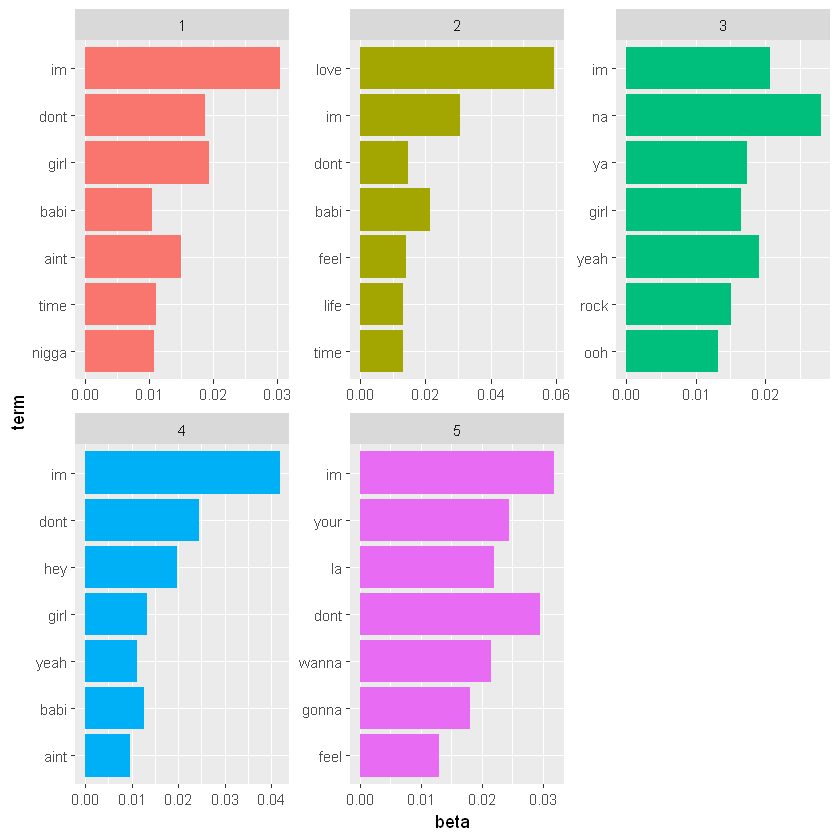

In [30]:
# I picked tidy_df_85_94_DTM because that was the best period of music, starting w/k = 5
topic_model_05_14_k5 <- LDA(tidy_df_05_14_DTM, k=5, control = list(seed = 321))
topic_model_05_14_k5 <- tidy(topic_model_05_14_k5, matrix = "beta")

music_05_14_topics_k5_terms <- 
  topic_model_05_14_k5 %>%
  group_by(topic) %>%
  top_n(7, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

music_05_14_topics_k5_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

## Question 6: 
Based on your output, does it seem like your value of k was a good choice for all decades of lyrics?

#### Using the searchK function from structural topic models:
Setting k = 5, was not particularly effective in across the 50 decade span. Because of this, I attempted to build a structural topic model and use the search k function across serveral of the datasets to see if that would provide some intuition on a better fitting model. 

In [11]:
processed <- textProcessor(df_85_94$Lyrics)
out <- prepDocuments(processed$documents, processed$vocab, processed$meta)

docs <- out$documents
vocab <- out$vocab
meta <-out$meta

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 7572 of 11254 terms (7572 of 69352 tokens) due to frequency 
Your corpus now has 962 documents, 3682 terms and 61780 tokens.

#### It appears my guesss of 5 over 10 and 20 was accurate, because you can see the semantic coherence going down as K increases.

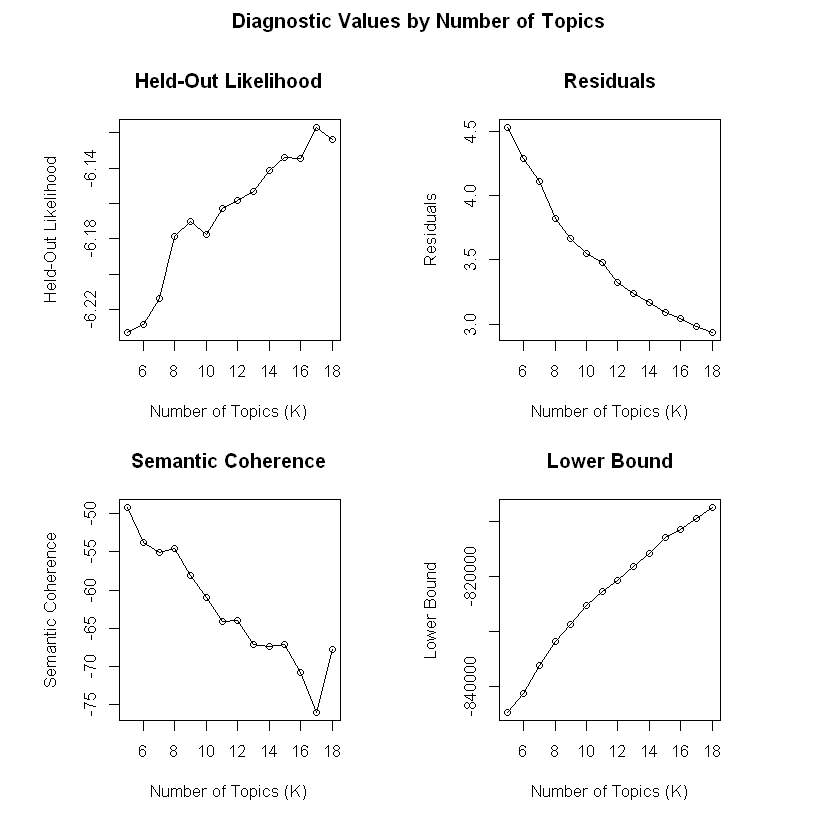

In [16]:
findingk <- searchK(out$documents, out$vocab, K = c(5:18), data = meta, verbose = FALSE)
plot(findingk)